In [107]:
# IBMQ.load_account()

In [108]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.aer import noise

import matplotlib.pyplot as plt
import numpy as np
import operator

%matplotlib inline

In [109]:
s = 1932 #1011 (wants the decimal input)

In [110]:
n = int.bit_length(s)
q = QuantumRegister(n)
c = ClassicalRegister(n)

qc = QuantumCircuit(q, c)

###########
#The Circuit


#Apply H to each 
qc.h(q)
qc.barrier()

#Oracle
for i in range(0,n):
    if (s & (1 << i)):  #this command takes decimal inputs
        qc.z(q[i])
        
qc.barrier()
#Apply H to each
qc.h(q)
qc.barrier()

#Measure Each
qc.measure(q,c)

#run the circuit

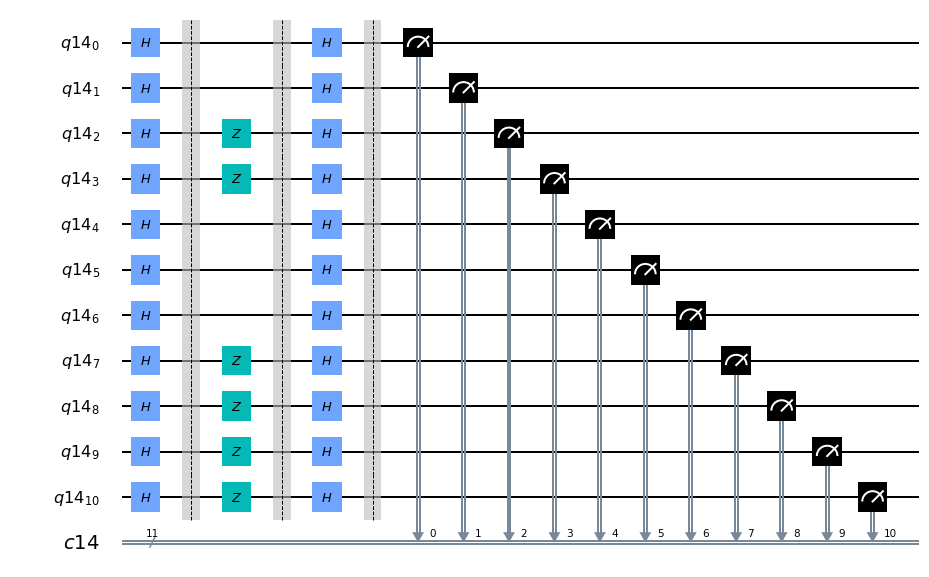

In [111]:
qc.draw(output='mpl')

{'11110001100': 8192}


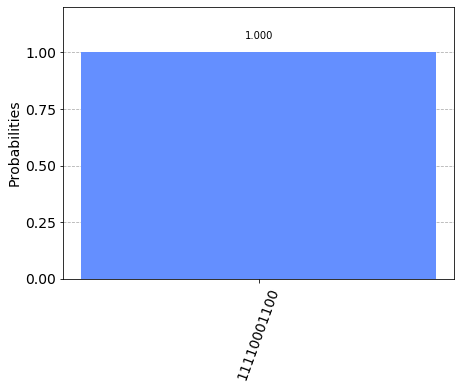

In [112]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024*2**3)
sim_result = job_sim.result()

measurment_result = sim_result.get_counts(qc)
print(measurment_result)
plot_histogram(measurment_result)

In [113]:

provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [114]:
device = provider.get_backend('ibmq_16_melbourne')
properties = device.properties()
coupling_map = device.configuration().coupling_map

noise_model = noise.device.basic_device_noise_model(properties)
basis_gates = noise_model.basis_gates

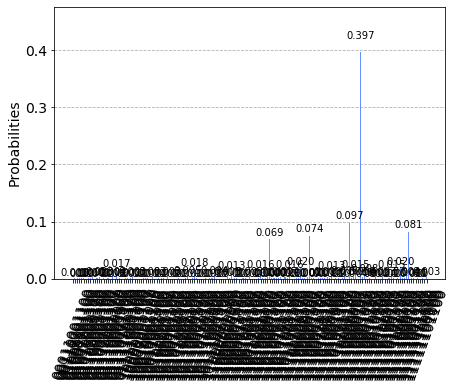

In [115]:
backend = Aer.get_backend('qasm_simulator')
job_exp = execute(qc, backend, shots = 1024*2**3,
                  coupling_map=coupling_map,
                  noise_model=noise_model,
                  basis_gates=basis_gates)

exp_result = job_exp.result()

exp_measurement_result = exp_result.get_counts(qc)
# print(exp_measurement_result)
plot_histogram(exp_measurement_result)

In [116]:
answer = max(exp_measurement_result.items(), key=operator.itemgetter(1))[0]
display(answer)

'11110001100'

In [117]:
Counts_of_Answer = exp_measurement_result[answer]
display(Counts_of_Answer)

3249